## EDA for the Student Performance dataset

Dataset is taken from: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

Problem Statement: This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

Things we should do:
 - Life cycle of Machine learning Project
 - Understanding the Problem Statement
 - Data Collection
 - Data Checks to perform
 - Exploratory data analysis
 - Data Pre-Processing
 - Model Training
 - Choose best model

Import required libraries : numpy, pandas, seaborn, matplotlib

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('C:\\Users\\User\\Desktop\\Frontend\\DS\\mlprojects\\notebook\\data\\StudentsPerformance.csv') 

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.shape

(1000, 8)

#### Data Checks that we should perform

- Missing values
- Duplicates
- data types
- number of unique values 
- stats of dataset
- categories for categorical cols

In [8]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

- Gender, race/ethnicity, parental level of education, lunch, test prepration course are categorical
- math score, reading score and writing score are numerical

In [12]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insights:
- math, reading and writing score have similar means and looks like similar distribution as well
- min score math is 0 and for others it is much bigger 17 and 10 respectively

In [13]:
#gender category
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [14]:
#race/ethnicity
data["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
#parental level of education
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
#lunch
data["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
#test preparation course 
data["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [18]:
# other way to check for categorical cols
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [19]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
numeric_features

['math score', 'reading score', 'writing score']

#### Creating columns for Total Score and Average score for each student

In [20]:
data["Total Score"] = data["math score"] + data["reading score"] + data["writing score"]
data["Average Score"] = data["Total Score"]/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Counting students who performend well in each test

In [21]:
good_math_test = data[data["math score"]>=90]["math score"].count()
good_reading_test = data[data["reading score"]>=90]["reading score"].count()
good_writing_test = data[data["writing score"]>=90]["writing score"].count()
print(f"Number of students who performed good in math test: {good_math_test}")
print(f"Number of students who performed good in reading test: {good_reading_test}")
print(f"Number of students who performed good in writing test: {good_writing_test}")

Number of students who performed good in math test: 58
Number of students who performed good in reading test: 79
Number of students who performed good in writing test: 78


#### Counting students who performed bad in each test

In [22]:
bad_math_test = data[data["math score"]<=20]["math score"].count()
bad_reading_test = data[data["reading score"]<=20]["reading score"].count()
bad_writing_test = data[data["writing score"]<=20]["writing score"].count()
print(f"Number of students who performed good in math test: {bad_math_test}")
print(f"Number of students who performed good in reading test: {bad_reading_test}")
print(f"Number of students who performed good in writing test: {bad_writing_test}")

Number of students who performed good in math test: 4
Number of students who performed good in reading test: 1
Number of students who performed good in writing test: 3


- So students performed worse in maths compared to other two
- Best performed test was reading test

### Data Visualization

#### Average score

<AxesSubplot:xlabel='Average Score', ylabel='Count'>

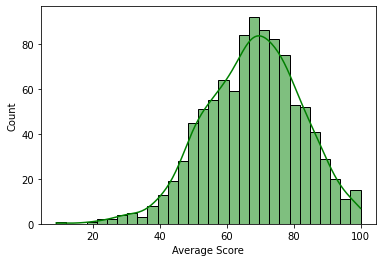

In [23]:
sns.histplot(data=data,x="Average Score",kde=True,color="g",bins=30)

#### Average score vs Gender

<AxesSubplot:xlabel='Average Score', ylabel='Count'>

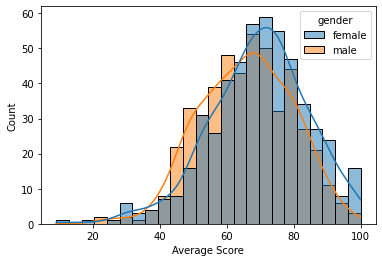

In [24]:
sns.histplot(data=data,x="Average Score",kde=True,hue="gender")

- Female have higher average score compared to male
- higher the score higher is the number of females who have that score

#### Total Score

<AxesSubplot:xlabel='Total Score', ylabel='Count'>

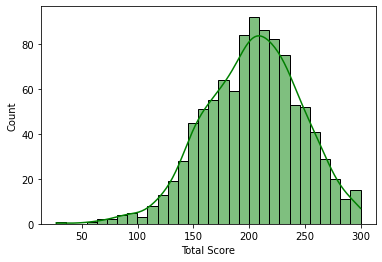

In [25]:
sns.histplot(data=data,x="Total Score",kde=True,color="g",bins=30)

#### Total Score vs Gender

<AxesSubplot:xlabel='Total Score', ylabel='Count'>

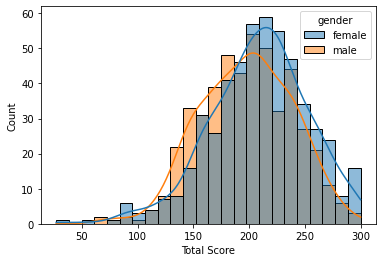

In [26]:
sns.histplot(data=data,x="Total Score",kde=True,hue="gender")

- similar trend compared to average score
- female tend to perform better compared to male

#### Average score vs lunch

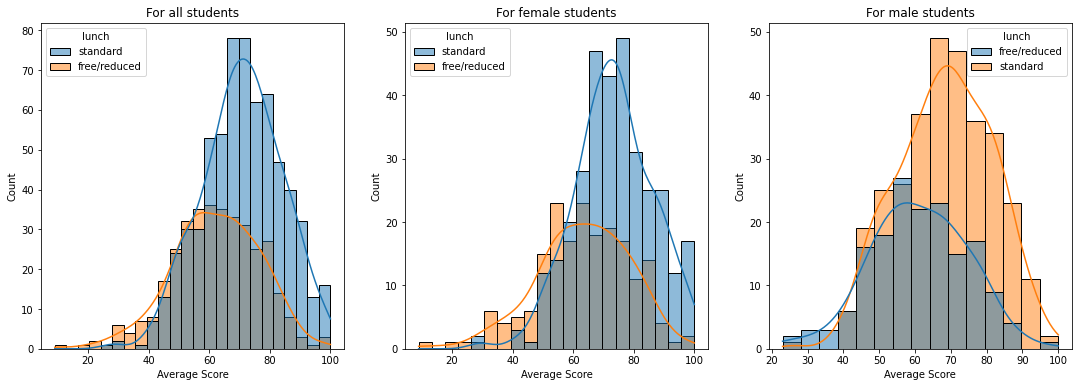

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average Score',kde=True,hue='lunch').set(title="For all students")
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average Score',kde=True,hue='lunch').set(title="For female students")
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average Score',kde=True,hue='lunch').set(title="For male students")
plt.show()

- It can be concluded that the students who are provided with the standard lunch perform better compared to the free/reduced lunch. 
- Gender does not have any impact on this as the above statements is true for both males and females.

#### Average score vs Parental level of education

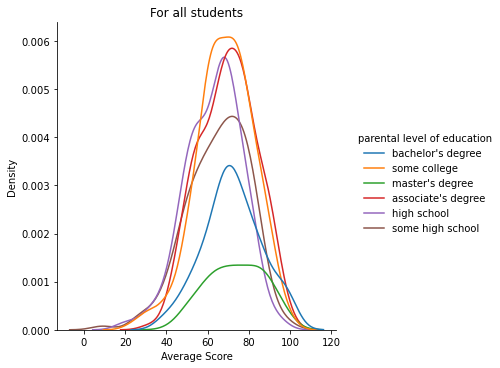

In [28]:
ax =sns.displot(data,x='Average Score',kind="kde",hue='parental level of education').set(title="For all students")

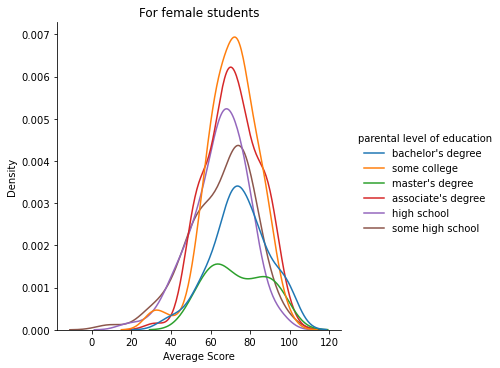

In [29]:
ax =sns.displot(data[data.gender=='female'],x='Average Score',kind="kde",hue='parental level of education').set(title="For female students")

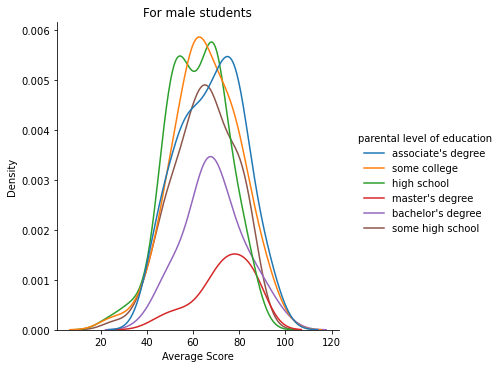

In [30]:
ax =sns.displot(data[data.gender=='male'],x='Average Score',kind="kde",hue='parental level of education').set(title="For male students")

- The level of education does not impact the grades of students overall.
- Male students whose parents hold associate's or master's degrees tend to achieve higher averages in exams.

#### Average score vs Race/ethnicity

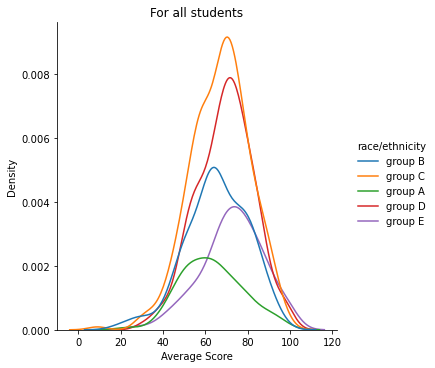

In [31]:
ax =sns.displot(data=data,x='Average Score',kind="kde",hue='race/ethnicity').set(title="For all students")

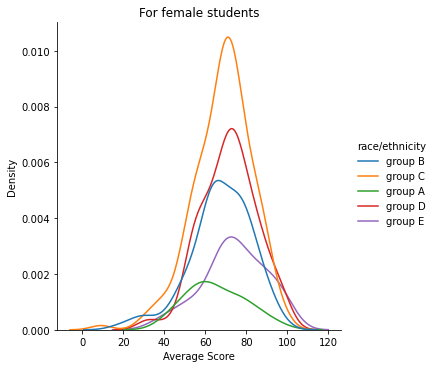

In [32]:
ax =sns.displot(data=data[data.gender=='female'],x='Average Score',kind="kde",hue='race/ethnicity').set(title="For female students")

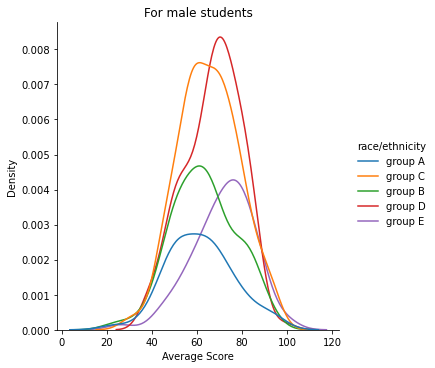

In [33]:
ax =sns.displot(data=data[data.gender=='male'],x='Average Score',kind="kde",hue='race/ethnicity').set(title="For male students")

- Students that belong to group A and B tend to perform worse on average compared to others irrespective of the gender
- For male students that belong to group C perform worse as well

#### Analysis of Parental level of education

##### Univariate analysis

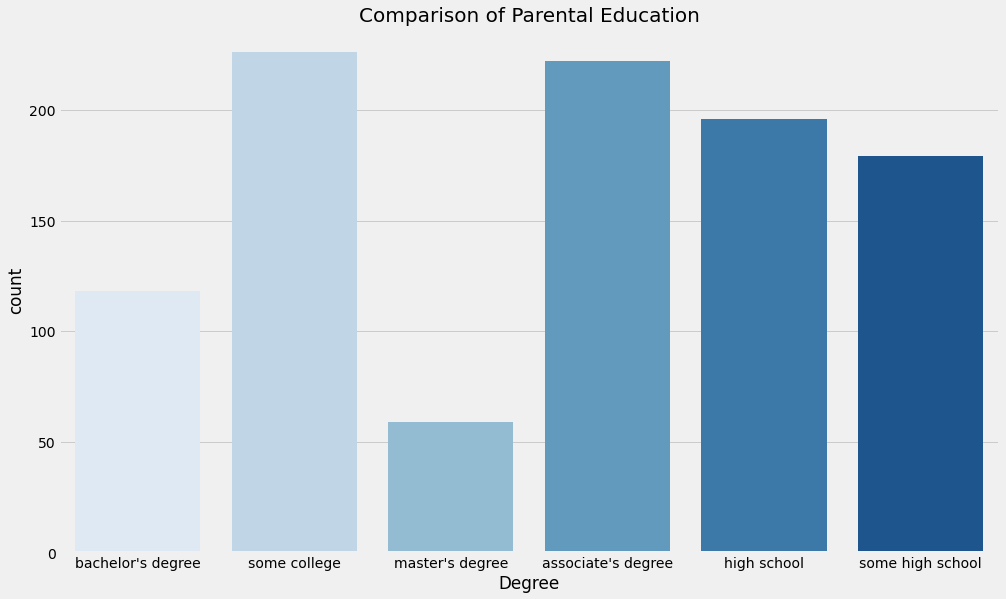

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Majority of the students have parents who have completed some college
- Least number of students have parents who have completed a masters degree

##### Bivariate analysis - impact of parental level of education on students's performance

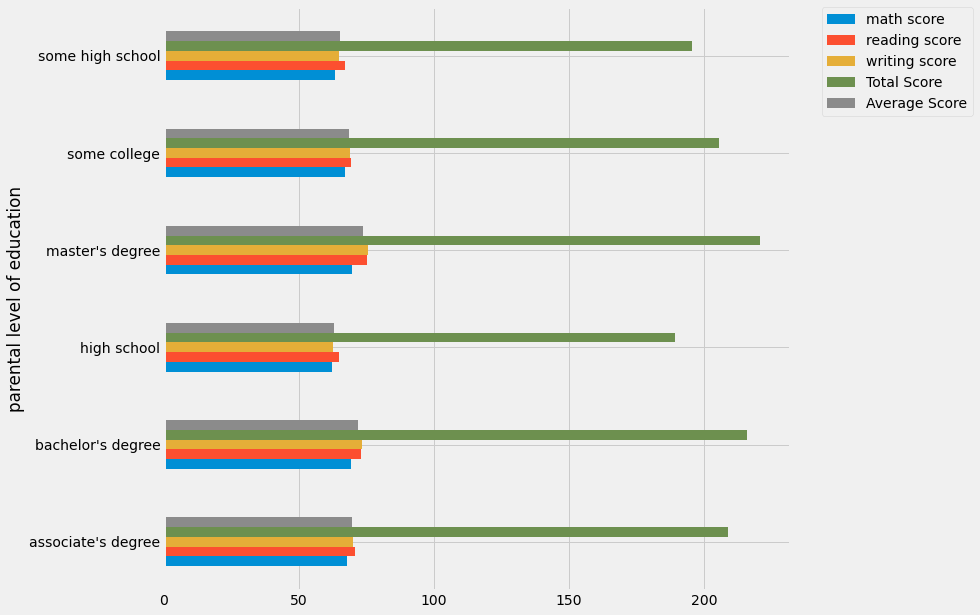

In [35]:
data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


- The score of students whose parents have completed master's or a bachelor's degree have high scores than others

#### Analysis of type of lunch

##### Univariate analysis

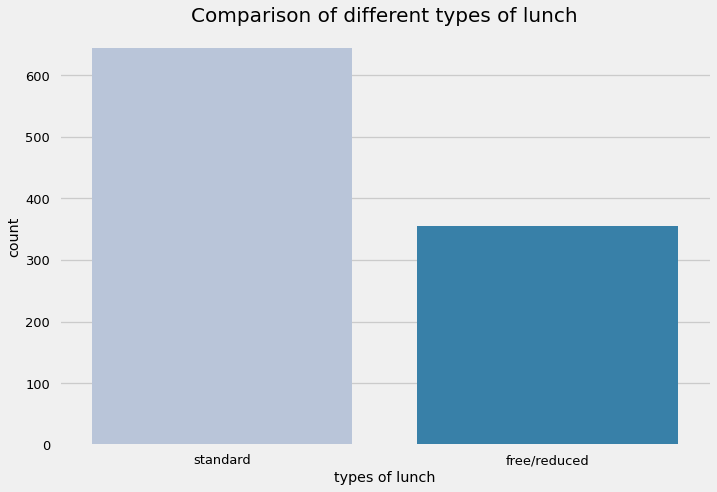

In [36]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Majority of the students have standard lunch

##### Bivariate analysis - impact of type of lunch on score of a student

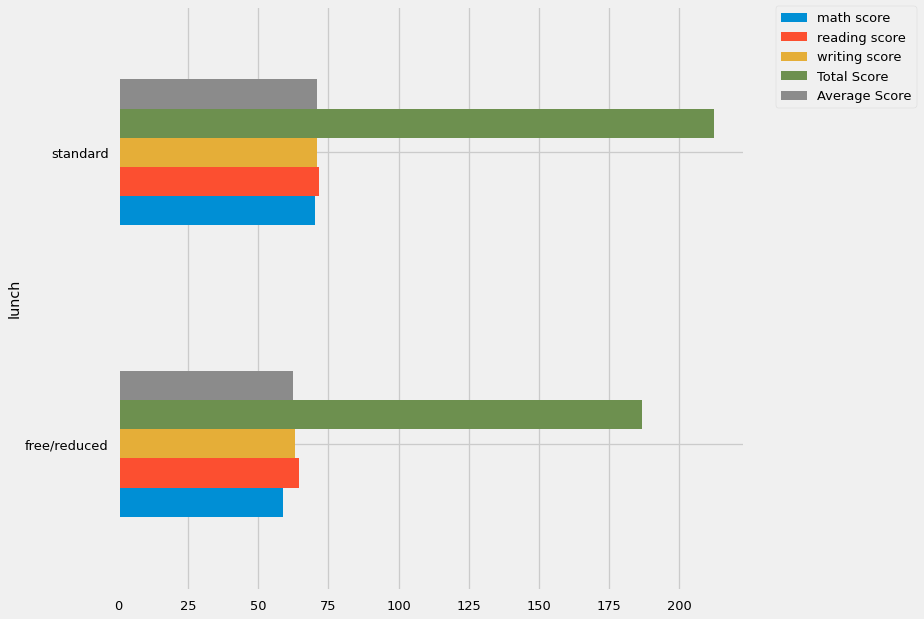

In [37]:
data.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


- The students who have standard lunch perform better on average in each exam

#### Analysis of Completion of Test Preparation Course

##### Univariate analysis

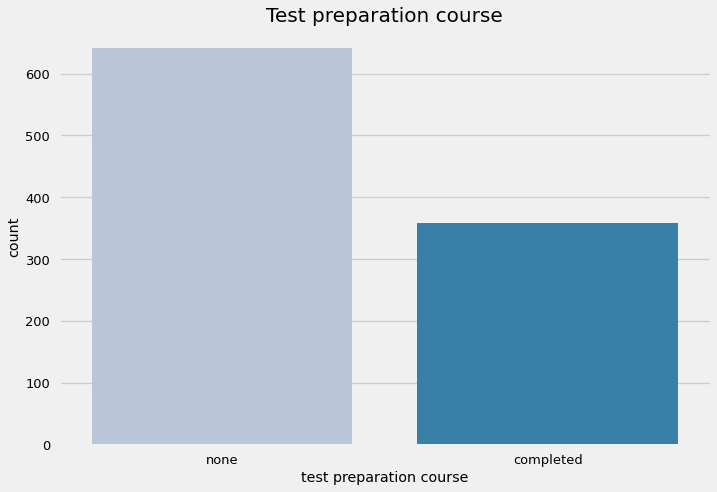

In [38]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data['test preparation course'], palette = 'PuBu')
plt.title('Test preparation course', fontweight = 30, fontsize = 20)
plt.xlabel('test preparation course')
plt.ylabel('count')
plt.show()

- Majority of students have not completed test prepration course

##### Bivariate analysis - impact of completion of test preparation course on score of student

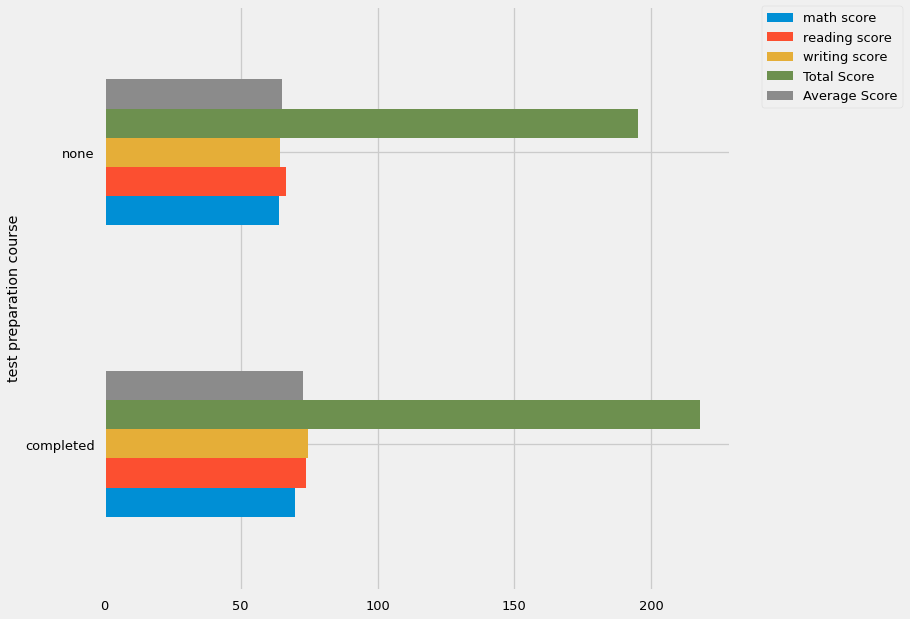

In [39]:
data.groupby('test preparation course').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- The students who have completed the test preparation course have better scores on average

#### Outliers

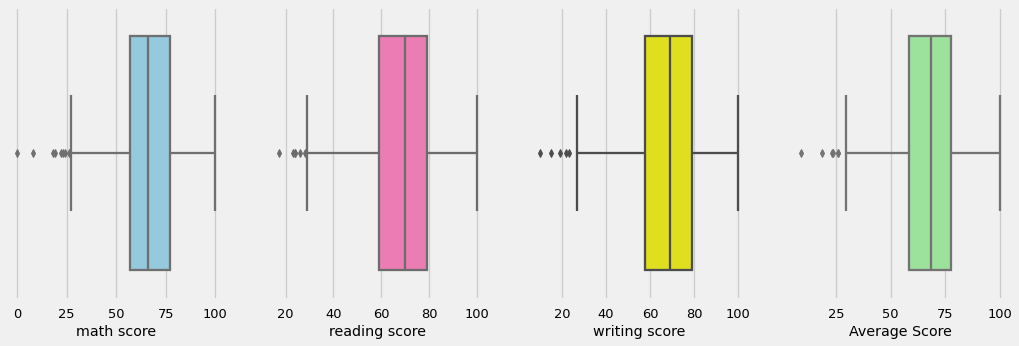

In [40]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average Score'],color='lightgreen')
plt.show()

#### Multivariate analysis using pairplot

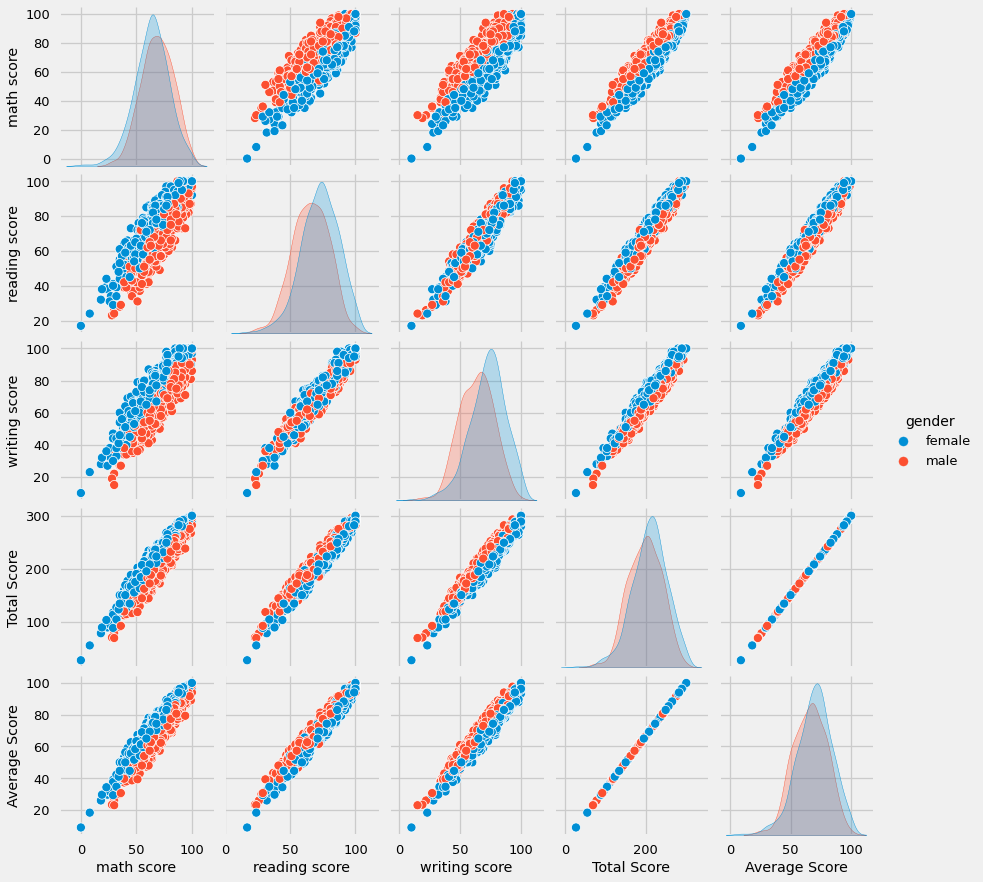

In [41]:
sns.pairplot(data,hue = 'gender')
plt.show()

- All the scores increase linerally with each other

##### Conclusions
- Performance of students is related with type of lunch, race, parental level of education
- Female students have high pass percentage
- Test preparation course completion does not have high impact on score however, it can be seen that it it beneficial on average